=== From-scratch Gaussian Naive Bayes ===
Accuracy: 0.9210526315789473
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

=== sklearn GaussianNB ===
Accuracy: 0.9210526315789473
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confus

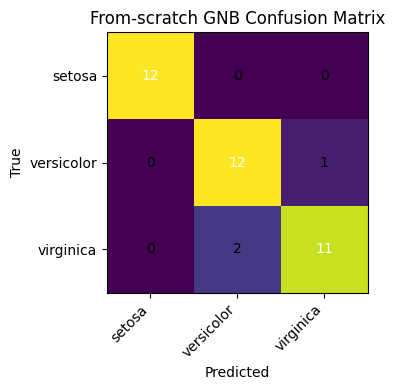

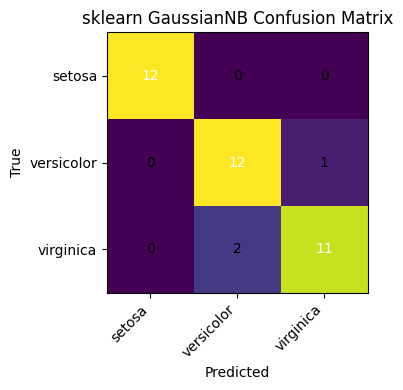

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from math import sqrt, pi, exp, log
import matplotlib.pyplot as plt


iris = datasets.load_iris()
X = iris.data            # shape (150, 4)
y = iris.target          # shape (150,)
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

class GaussianNaiveBayes:
    def __init__(self, eps=1e-9):
        """
        eps: small value added to variance to avoid division by zero
        """
        self.eps = eps
        self.classes_ = None
        self.class_priors_ = None
        self.means_ = None
        self.vars_ = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        n_classes = self.classes_.size

     
        self.means_ = np.zeros((n_classes, n_features))
        self.vars_ = np.zeros((n_classes, n_features))
        self.class_priors_ = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.means_[idx, :] = X_c.mean(axis=0)
         
            self.vars_[idx, :] = X_c.var(axis=0) + self.eps
            self.class_priors_[idx] = X_c.shape[0] / X.shape[0]

    def _gaussian_log_likelihood(self, class_idx, x):
        """
        Compute log P(x | class) assuming Gaussian per feature and independence.
        x: shape (n_features,)
        returns scalar log-likelihood
        """
        mean = self.means_[class_idx]
        var = self.vars_[class_idx]
     
        log_likelihood = -0.5 * np.sum(np.log(2.0 * np.pi * var) + ((x - mean) ** 2) / var)
        return log_likelihood

    def predict(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples, dtype=self.classes_.dtype)

        for i in range(n_samples):
            log_posteriors = []
            for idx, c in enumerate(self.classes_):
                log_prior = np.log(self.class_priors_[idx])
                log_likelihood = self._gaussian_log_likelihood(idx, X[i])
                log_posteriors.append(log_prior + log_likelihood)
          
            y_pred[i] = self.classes_[np.argmax(log_posteriors)]
        return y_pred


gnb_scratch = GaussianNaiveBayes()
gnb_scratch.fit(X_train, y_train)
y_pred_scratch = gnb_scratch.predict(X_test)

print("=== From-scratch Gaussian Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Classification report:\n", classification_report(y_test, y_pred_scratch, target_names=class_names))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_scratch))


from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

print("\n=== sklearn GaussianNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Classification report:\n", classification_report(y_test, y_pred_sklearn, target_names=class_names))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_sklearn))


def plot_confusion(cm, title):
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ticks = np.arange(len(class_names))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_yticklabels(class_names)
    # annotate
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')
    plt.tight_layout()

cm_scratch = confusion_matrix(y_test, y_pred_scratch)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

plot_confusion(cm_scratch, "From-scratch GNB Confusion Matrix")
plot_confusion(cm_sklearn, "sklearn GaussianNB Confusion Matrix")

plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 21))
}

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                
    scoring='accuracy'    
)


grid.fit(X_train, y_train)

print("Best K value:", grid.best_params_['n_neighbors'])
print("Best Cross-Validation Accuracy:", grid.best_score_)


best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

print("Test Accuracy with Best K:", accuracy_score(y_test, y_pred))


Best K value: 6
Best Cross-Validation Accuracy: 0.9640316205533598
Test Accuracy with Best K: 0.9736842105263158
